# 24.1. Classification

**Machine Learning**

The art and science of computers the ability to learn to make decisions from data.

Three categories of ML:

**1. Supervised learning:**
    Uses labeled data

**2. Unsupervised learning:**
    Uses unlabeled data
    
**3. Reinforcement learning:** 
    Software agents interact with an environment, Learn how to optimize their behavior, Given a system of rewards and punishments

![](ml.JPG)

## 24.1.1. Supervised learning

**Supervised learning: Classification**

- Automate time-consuming or expensive manual tasks

- Make predictions about the future

- Need labeled data

- ML libraries:

    - sklearn
    - TensorFlow
    - keras
    - NLTK
    - Spacy...etc

## 24.1.2. Exploratory data analysis (EDA)

- Before thinking about what supervised learning models to apply we need to perform Exploratory data analysis (EDA) in order to understand the structure of the data.

- EDA helps us to explore the data
- common EDA's:
    - head()
    - tail()
    - info()
    - describe()

- Helps us to determine :

    - Data Quality
    - If any missing values
    - correct Data Types
    - correct data formats 
    - data distribution ..etc
    
#### The Iris dataset in scikit-learn

In [100]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [101]:
from sklearn import datasets

iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [102]:
#print(iris)

**Iris datatype is bunch = key value pair**

In [103]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [104]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [105]:
iris.data.shape

(150, 4)

In [106]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [107]:
data_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays

In [108]:
data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [109]:
data_iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [110]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [111]:
#creates the df with out col lebel

dfx = pd.DataFrame(iris.data)
dfx.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Visual EDA

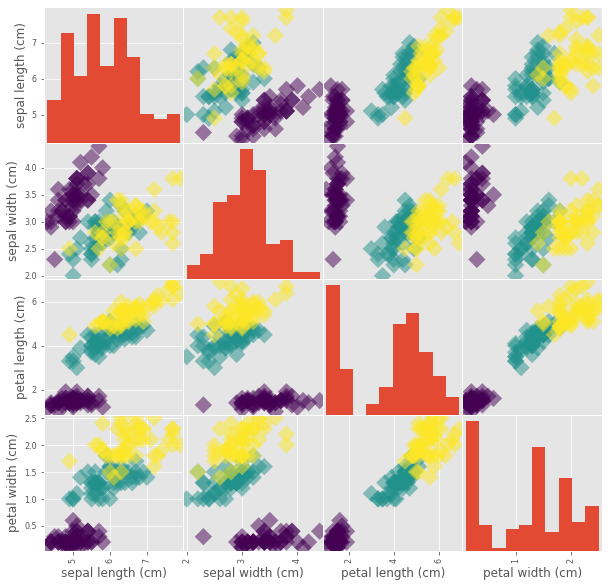

In [112]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [10, 10],
s=150, marker = 'D')

## 24.1.3. The classifcation challenge

Choose a classifier

#### e.g k-Nearest Neighbors Iris Data set

- Basic idea: Predict the label of a data point by:

    - Looking at the ‘k’ closest labeled data points
    - Taking a majority vote

Further questions:

- what's the optimal K?  

__To find optimal K:__ 

    - sketch Model complexity curve
    - Grid search 


### fit and predict

All machine learning models implemented as Python __classes__

- Training a model on the data = ‘fitting’ a model to the data
`.fit()` method

- To predict the labels of new data: 
`.predict()` method

In [113]:
from sklearn.model_selection import train_test_split
X = iris['data']
y= iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=21, 
                                                    stratify=y)

__X = iris['data']__

is Data

will be split into X_train, X_test

__y= iris['target']__

is lebel

will be split into y_train, y_test


Steps:

1. `.fit()`  : Train the model with X_train (training Data), y_train(lebel for the tarinig data)

2. `.predict()` : 

    - predict lebels for unseen Data
    - using X_test predict lebels y_pred
    
3. evaluate/Validate:

    - compare predicted lebels __y_pred__ with __y_test__ (held out set of lebel data)
    - compare y_test with y_pred, this is __validation!__

## 24.1.4. Measuring model performance

In [114]:
from sklearn.neighbors import KNeighborsClassifier

#instantiate KNN , create knn object 
knn = KNeighborsClassifier(n_neighbors=8)

#train
knn.fit(X_train, y_train)

#predict
y_pred = knn.predict(X_test)

In [115]:
print("Test set predictions: \n", y_pred)

Test set predictions: 
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [116]:
knn.score(X_test, y_test)

0.9555555555555556

#### k-Nearest Neighbors Model complexity

- Larger k = smoother decision boundary = less complex model = can lead to under fitting
- Smaller k = more complex model = can lead to overftting

#### Model Complexity Curve(MCC): 
- what's the optimal K?
- MCC helps us to find it!

In [117]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [118]:

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

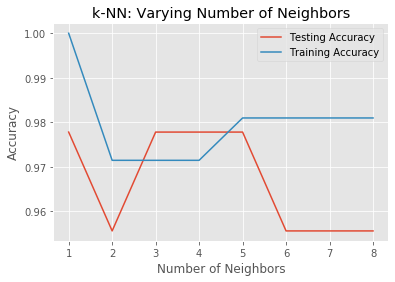

In [119]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### e.g MNIST digits recognition dataset 

In [120]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
#print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [121]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


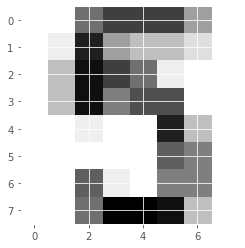

In [122]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [123]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


### What is the optimal K?

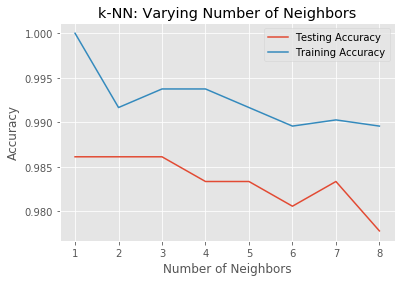

In [124]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# 24.2 Supervised learning: Regression

Regression is a form of Supervised machine learning where the target variable is a __continuous variable__.


e.g predicting the average temperature of a given area at a given hour / day of the year. 

## 24.2.1. Introduction to regression
__Ex: bostonhousing price prediction__

In [125]:
# Import numpy and pandas
import numpy as np
import pandas as pd

In [126]:
# Read the CSV file into a DataFrame: df
boston = pd.read_csv('bostonhousing.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [127]:
boston.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [128]:
# Create arrays for features and target variable
X = boston.drop('MEDV', axis=1).values   # value/feature
y = boston['MEDV'].values                # target

In [129]:
#print(X)

In [130]:
#print(y)  # target is a continuous variable --> Regression Task

__Predicting house value from a single feature: RM__

In [131]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [132]:
X_rooms.shape

(506,)

In [133]:
y.shape

(506,)

In [134]:
#X_rooms

In [135]:
#print(X_rooms)

In [136]:
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

In [137]:
X_rooms.shape

(506, 1)

In [138]:
y.shape

(506, 1)

In [139]:
#print(X_rooms)

In [140]:
#print(y)

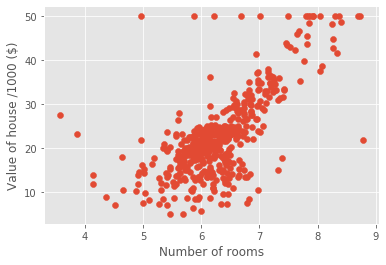

In [141]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

__Fitting a regression model__

In [142]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_rooms, y)

prediction_space = np.linspace(min(X_rooms),
max(X_rooms)).reshape(-1, 1)

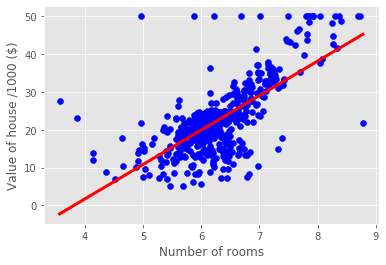

In [143]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),
color='red', linewidth=3)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

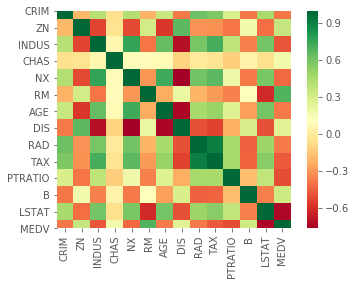

In [144]:
import seaborn as sns
sns.heatmap(boston.corr(), square=True, cmap='RdYlGn')

In [145]:
#y

## 24.2.2. The basics of linear regression

- **In regression we want to fit a line to a data!**

- a line in 2D is always in the form:
    
    - y = ax + b
        
        - y = target
        - x = single feature
        - a, b = parameters of model that we want to learn

- so the question of fitting is reduced to how do we choose a and b??
    - a common method is to define an __ERROR FUNCTION!__ and to Choose the line that **minimizes** the error function.
    - __ERROR FUNCTION__ aka :
        - **LOSS FUNCTION**
        - **COST FUNCTION**
        
#### The LOSS/COST/ ERROR function

What is our loss func?

- We wish to minimize the vertical distance between our line and the data points! 

- So for each data point we calculate the vertical distance from our line. This vertical deistance is known as **RESIDUAL**.

- We could try to minimize the SUM of the residuals but this leads to a large positive residual to be __CANCELLED OUT__ with the large negative residual! 
- Because of that we want to minimize the __SUM__ of the __SQUARE__ of the residuals.
- This will be our loss function and it is known as __OLS(Ordinary least squares(OLS).__
    - Ordinary least squares(OLS) : Minimize sum of squares of residuals"
    - when we call .fit() on linear reg model, our model performs OLS under the hood!
 
#### Linear regression in higher dimensions

- When we have 2 features and 1 target a line is of the form:
    - y = a1x1 + a2x2 + b
    
- To fit a linear regression model here, we Need to specify 3 variables (a1, a2, b)

- In higher dimensions, Must specify coeffcient for each feature and the variable b
    - y = a1 x1 + a2 x2 + a3 x3 + ... + an xn + b
    
#### Linear regression Model performance

- In the world of classification we use __Accuracy__ as a metric of model performance. The default scoring method for linear regression is called __R-Squared!__  
- __R-Squared:__ quantifies the amount of Varienace in the __Target Variable__ that is predicted from the feature variables!
- To compute R-Squared, call __.score(X_test, y_test)__ on the model.
- Usually it's not common to use out of the box Regression model, but we need more __Regularized__ ones!

In [146]:
# Import numpy and pandas
import numpy as np
import pandas as pd

In [147]:
boston = pd.read_csv('bostonhousing.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [148]:
X = boston.drop('MEDV', axis=1).values   # value/feature
y = boston['MEDV'].values 

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7112260057484953

#### e.g. Train/test split for regression : gapminder

In [150]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df_gap = pd.read_csv('gapminder.csv')
df_gap.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [151]:
X_gap = df_gap.drop(['life','Region'], axis=1).values # value/feature
y_gap = df_gap['life'].values 

In [152]:
#X

In [153]:
#y

In [154]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_gap, y_gap, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430135
Root Mean Squared Error: 3.2476010800369455


## 24.2.3. K-fold Cross Validation

- Model performance is dependent on way the data is split

- Not representative of the model’s ability to generalize

- Solution: Cross-validation!

- 5 folds = 5-fold CV, 10 folds = 10-fold CV

- k folds = k-fold CV

- More folds = More computationally expensive

- __cross_val_score__ is __R-Squared__ since it is a defautlt score for Linear Reg!

In [155]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_gap = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores_gap)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [156]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_gap)))

Average 5-Fold CV Score: 0.3532759243958813


#### K-Fold CV comparison

In [157]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_2 = cross_val_score(reg, X, y, cv=2)
print(np.mean(cvscores_2))

# Perform 10-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

-0.8228827721446473
-1.5841985220997372


As we can see the higher the fold, we see a different score!

## 24.2.4. Regularized Regression


As we can remeber liner regression minimizes loss function i.e it chooses ai coeffifients for each feature variable x.


Large coefficients lead to __overfitting!__

Regularization is the __process of penalizing__ large coefficinets! 


Examples of Regularized Regression are:

__1. Ridge Regression__

__2. Lasso Regression__

**1. Ridge Regression**

- Parameter alpha determines model complexity

- alpha = 0 back to basic regression

- if alpha is too large, too much penalization ..will cause under fitting

- Choosing alpha is same as choosing K for K-NN.

- The __right value of alpha__ should be found by __hyper-parameter-tuning.__

In [158]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

ridge = Ridge(alpha=0, normalize=True)

ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

ridge.score(X_test, y_test)

0.7112260057484925

As we can see we found the R^2: 0.8380468731430135, which is the same result as basic regression model ( alpha = 0)!

In [159]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

ridge = Ridge(alpha=1, normalize=True)

ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

ridge.score(X_test, y_test)

0.6241064474736235

So for alpha = 1, we get a slight improvement / better R^2 result.  The best possible value of alpha should be found by **hyper parameter tuning!**

#### 2. Lasso Regression

- Is very useful for **feature selection**, this is beacuse it Shrinks the coeffcients of less important features to exactly **0**! 

- The features whose coefficients are **NOT SHRUNK** to zero are selected by **Lasso algorithm as important features!!!**

- Shows which feature is the most imporatnt when making predictions!

In [160]:
# Read the CSV file into a DataFrame: df
boston = pd.read_csv('bostonhousing.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [161]:
X = boston.drop('MEDV', axis=1).values   # value/feature
y = boston['MEDV'].values 

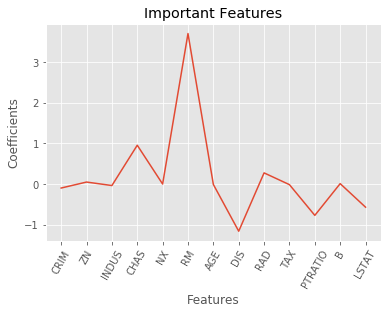

In [162]:
from sklearn.linear_model import Lasso

names = boston.drop('MEDV', axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

_ = plt.plot(range(len(names)), lasso_coef)

_ = plt.xticks(range(len(names)), names, rotation=60)

_ = plt.ylabel('Coefficients')
_ = plt.xlabel('Features')
_ = plt.title('Important Features')

plt.show()

In [163]:
print(lasso_coef)

[-0.09789363  0.04921111 -0.03661906  0.95519003 -0.          3.70320175
 -0.01003698 -1.16053834  0.27470721 -0.01457017 -0.77065434  0.01024917
 -0.56876914]


#### Exercises on Gapminder Data

In [164]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Read the CSV file into a DataFrame: df
gapminder = pd.read_csv('gapminder.csv')
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [165]:
# Create arrays for features and target variable
# Create array X for the 'fertility' feature and 
# array y for the 'life' target variable.

y_gapminder = gapminder['life'].values
X_gapminder_fertility = gapminder['fertility'].values

In [166]:
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y_gapminder.shape))
print("Dimensions of X before reshaping: {}".format(X_gapminder_fertility.shape))

# Reshape X and y
y_gapminder = y_gapminder.reshape(-1,1)
X_gapminder_fertility = X_gapminder_fertility.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y_gapminder.shape))
print("Dimensions of X after reshaping: {}".format(X_gapminder_fertility.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


0.6192442167740035


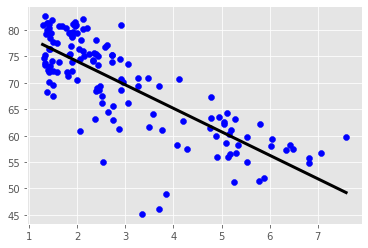

In [167]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_gapminder_fertility), max(X_gapminder_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_gapminder_fertility, y_gapminder)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_gapminder_fertility, y_gapminder))

# Plot regression line
plt.scatter(X_gapminder_fertility, y_gapminder, color='blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

#### Train/test split for regression : gapminder

In [168]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df_gap = pd.read_csv('gapminder.csv')
df_gap.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [169]:
X_gap = df_gap.drop(['life','Region'], axis=1).values # value/feature
y_gap = df_gap['life'].values 

In [170]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_gap, y_gap, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430135
Root Mean Squared Error: 3.2476010800369455


#### e.g. Regularization I: Lasso : gapminder

In [171]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X_gap, y_gap)

# Compute and print the coefficients
lasso_coef = lasso.fit(X_gap, y_gap).coef_
print(lasso_coef)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


In [172]:
# Plot the coefficients
gap_columns = gapminder.drop(['life','Region'], axis=1).columns
print(gap_columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')


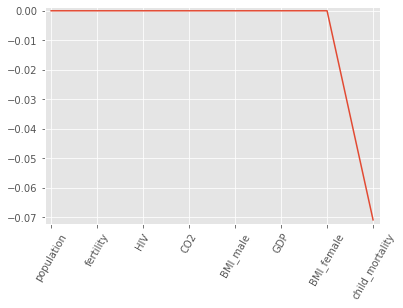

In [173]:
plt.plot(range(len(gap_columns)), lasso_coef)
plt.xticks(range(len(gap_columns)), gap_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [174]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

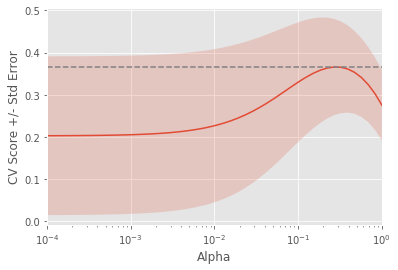

In [175]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(alpha= True,normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

# 24.3 Fine-tuning your model

## 24.3.1. How good is your model

**Class imbalance**

- a situation where on class is more frequent than the other
- Accuracy is not always a useful metric especially when there is class imbalance
- e.g in Spam classifier we have way more instances of real email than spam email
       - So our classifier might not be able detect not even one spam email and will still get a          high score, 99%. 
- for this reason we need other performance measures or metrics to correctly measure the performance of our model.

**Confusion Matrix**

- from the confusion Matrix we can calculate all performance metrics (including Accuracy):
    
    - Accuracy
    - Precision
    - Recall
    - F1 Score
- each measures show different aspects of the model performance:
    
    - High precision: Not many real emails predicted as spam

    - High recall: Predicted most spam emails correctly

In [184]:
# IrisDataSet
from sklearn import datasets

iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [187]:
import numpy as np
import pandas as pd


X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [189]:
from sklearn.model_selection import train_test_split

X = iris['data']
y= iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=21, 
                                                    stratify=y)

In [191]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [193]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Matrix = confusion_matrix(y_test, y_pred)

Report = classification_report(y_test, y_pred)

In [196]:
print(Matrix)

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


In [197]:
print(Report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## 24.3.2. Logistic regression and the ROC curve

__Logistic regression__

- is another classification algorithm
- despite its name, Logistic regression, is used in Classification problem. Not Regression!

__Logistic regression for a binary classification__

- binary classification, when we have two possible labels for a target variable

- Logistic regression outputs probabilities.

- If the probability ‘p’ is greater than 0.5:
    - The data is labeled ‘1’
- If the probability ‘p’ is less than 0.5:
    - The data is labeled ‘0’
    
- Note: Log Reg uses a **LINEAR DECISION BOUNDARY!**

In [206]:
# iris Data Set

from sklearn.model_selection import train_test_split

X = iris['data']
y= iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=21, 
                                                    stratify=y)

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

logreg.score(X_test, y_test)

C:\Users\bky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9777777777777777

In [229]:
# Diabetes Data

import pandas as pd
import numpy as np

diabets = pd.read_csv("Diabetes.csv")
col = diabets.keys()

In [230]:
X_dia = diabets.drop(['diabetes'], axis=1).values # value/feature
y_dia = diabets['diabetes'].values 

In [244]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X_dia, y_dia, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train_dia, y_train_dia)

# Predict the labels of the test set: y_pred
y_pred_dia = logreg.predict(X_test_dia)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test_dia, y_pred_dia))
print(classification_report(y_test_dia, y_pred_dia))

[[174  32]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



C:\Users\bky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Probability thresholds

- By default, logistic regression threshold = 0.5.

- Not specific to logistic regression.

    - e.g. k-NN classifiers also have thresholds
    
- What happens if we vary the threshold? 
    - WE WILL FIND ROC Curve!
    
#### ROC Curve

- When the threshold = 0:
    
    - The model predicts 1 for all the data.
    - TP = FP = 1
    
- When the threshold = 1:

    - The model predicts 0 for all the data.
    - TP = FP = 0

- If we vary the threshold between 0 and 1:
    
    - we get a series of different FP and TP rates!

- The set of all possible points that we get when we vary the threshold between 0 and 1 is called **ROC Curve!( THE RECIVA OPRATING CHARACTERSTIC CURVE).**

#### Plotting ROC Curve

Predict Proba:

- returns an array with 2 columns
- each column contains the probability for the respective target values:
    - the first column : probability being zero
    - the 2nd coluns: probability being one

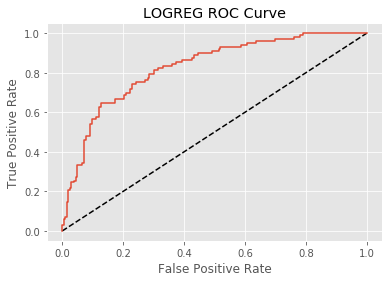

In [252]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob_dia = logreg.predict_proba(X_test_dia)[:,1] # select probability of 1

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_dia, y_pred_prob_dia)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'LOG_REG')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LOGREG ROC Curve')
plt.show()

## 24.3.3. Area under the ROC curve: AUC

- Q. Given the ROC Curve, can we extract a matrix of interest??

- The larger the area under the ROC curve, the better our model is!

- Ideally, the largest possible area of the ROC Curve produces:

     - TP rate of 1 
     - FP rate of 0
     
         - 0 error
- This would be a perfect model!

- Beacuse of this measures, the area under the ROC Curve is also used as a measure for performance evaluation for our model!

- To compute AUC we can:
   
   1. use the scikit library:
         - from sklearn.metrics import roc_auc_score
     
   2. AUC using cross-validation
         - from sklearn.model_selection import cross_val_score

In [256]:
from sklearn.metrics import roc_auc_score
logreg = LogisticRegression()

X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X_dia, y_dia, test_size=0.4, random_state=42)
logreg.fit(X_train_dia, y_train_dia)

y_pred_prob_dia = logreg.predict_proba(X_test_dia)[:,1]

roc_auc_score(y_test_dia, y_pred_prob_dia)

C:\Users\bky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8268608414239482

#### AUC using cross-validation

In [255]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X_dia, y_dia, cv=5,
scoring='roc_auc')
print(cv_scores)

[0.7987037  0.80759259 0.81944444 0.86622642 0.85056604]


C:\Users\bky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

## 24.3.4. Hyperparameter tuning

## 24.3.5. Hold-out set for final evaluation

# 24.4. Preprocessing and pipelines


## 24.4.1. Preprocessing data

## 24.4.2. Handling missing data

## 24.4.3. Centering and scaling

## 24.4.4. Final thoughts